In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc = 50, scale = 5, size = 1000)

In [2]:
sample.mean()

50.04609194451149

(array([  2.,   0.,   0.,   3.,   3.,   5.,  10.,  14.,  30.,  39.,  51.,
         65.,  88., 100.,  87., 107.,  74.,  64.,  68.,  52.,  48.,  33.,
         20.,  12.,   9.,  10.,   2.,   1.,   2.,   1.]),
 array([32.25594039, 33.42880705, 34.6016737 , 35.77454036, 36.94740702,
        38.12027368, 39.29314033, 40.46600699, 41.63887365, 42.81174031,
        43.98460696, 45.15747362, 46.33034028, 47.50320694, 48.6760736 ,
        49.84894025, 51.02180691, 52.19467357, 53.36754023, 54.54040688,
        55.71327354, 56.8861402 , 58.05900686, 59.23187351, 60.40474017,
        61.57760683, 62.75047349, 63.92334014, 65.0962068 , 66.26907346,
        67.44194012]),
 <BarContainer object of 30 artists>)

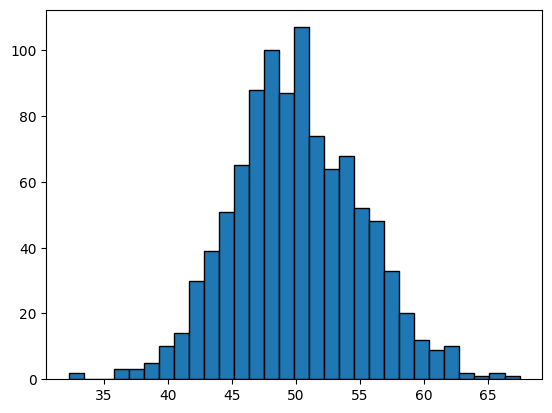

In [3]:
plt.hist(sample, bins = 30, edgecolor = 'black')

In [5]:
sample_mean = sample.mean()
sample_std = sample.std()
sample_std

5.034352739386183

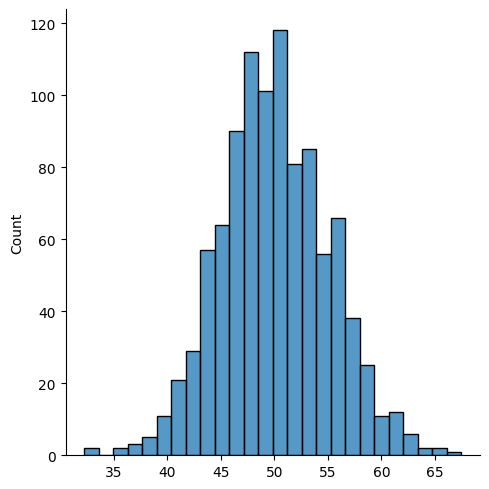

In [7]:
import seaborn as sns
sns.displot(sample)

In [10]:
sample1 = normal(loc = 50, scale = 5, size = 1000)
sample2 = normal(loc = 50, scale = 5, size = 1000)
sample = np.hstack((sample1, sample2))

In [11]:
sample

array([46.70064887, 50.68333247, 58.60117837, ..., 51.8221174 ,
       47.2391966 , 46.84707307])

<Axes: ylabel='Density'>

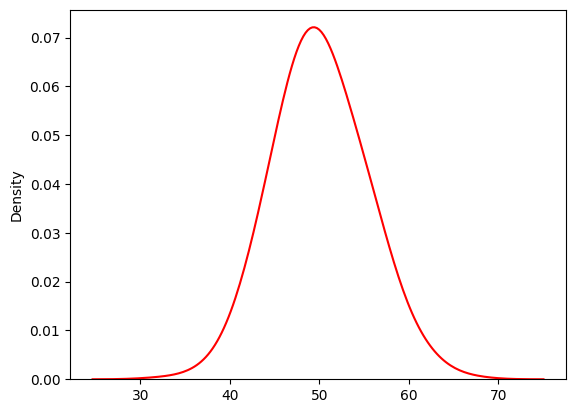

In [9]:
sns.kdeplot(sample.reshape(1000), color = 'red', bw_adjust=2)